# Project 2 - Part 1: Data Loading and Initial Exploration (15 pts)

The data for this project is stored in the `data` folder in your repositories, in the `SOTU.csv` file. The data file is structured as a CSV with columns for president name, speech text, year, and word count in the speech. 

In this section you will:

1. Import the data into a pandas dataframe
2. Perform exploratory data analysis (EDA) including specifically:
- Analyze the number of speeches per president
- Analyze the number of speeches per year
- Analyze the word count distribution
- Analyze the word count distribution accross years using a rug plot
- Analyze the average word count per president
3. Write commentary on your findings

First, create the `conda` environment with the provided yaml file. Note, it's not unusual for it to take ~15 minutes for the environment to fully install.

### Read Data

In [157]:
####################
## MOVE THIS BLOCK TO part00_utils_visuals.py
####################

####################
## CALL THIS BLOCK TO part00_utils_visuals.py
####################

# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark')

In [158]:
####################
## MOVE THIS BLOCK TO part00_utils_visuals.py
####################

####################
## CALL THIS BLOCK TO part00_utils_visuals.py
####################

###
# Types
###
import typing as ty

###
# Paths
###
 
# from pathlib import Path 
import pathlib as pl

HOME                = pl.Path.home()
PROJECTS            = "Projects"
STAT                = "STAT_159_259"
PROJ_GRP            = "proj02-group08"

DIR_CODE            = HOME / PROJECTS / STAT / PROJ_GRP / "code"
DIR_DATA            = HOME / PROJECTS / STAT / PROJ_GRP / "data" 
DIR_DATA_RAW        = DIR_DATA / "00_raw"
DIR_DATA_PROCESSED  = DIR_DATA / "01_processed"
DIR_DATA_VECTORIZED = DIR_DATA / "02_vectorized"
DIR_DOCS            = HOME / PROJECTS / STAT / PROJ_GRP / "docs"
DIR_MISC            = HOME / PROJECTS / STAT / PROJ_GRP / "misc"
DIR_NOTEBOOKS       = HOME / PROJECTS / STAT / PROJ_GRP / "notebooks"
DIR_OUTPUTS         = HOME / PROJECTS / STAT / PROJ_GRP / "outputs"
DIR_TESTS           = HOME / PROJECTS / STAT / PROJ_GRP / "tests"

###
# 
###
XDIMENSION = 12
YDIMENSION = 8

def plot_settings_for_figure_size(
    xdimension:int=12,
    ydimension:int=6
):
    # Method 1: Using sns.set()
    sns.set(rc = {'figure.figsize':(xdimension, ydimension)})  # Global setting for all plots
    
    # Method 2: Using Matplotlib's rcParams
    plt.rcParams["figure.figsize"] = (xdimension, ydimension)  # Another global setting

plot_settings_for_figure_size(XDIMENSION, YDIMENSION)

In [159]:
####################
## MOVE THIS BLOCK TO part00_utils_visuals.py
####################

####################
## CALL THIS BLOCK TO part00_utils_visuals.py
####################

# read in SOTU.csv using pandas, name the variable `sou` for simplicity
# the below cell is what the output should look like

sou = pd.read_csv(filepath_or_buffer=pl.Path(DIR_DATA_RAW) / "SOTU.csv", header=0)

In [160]:
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


### Exploratory Data Analysis

Replicate the plots below using the hints specified. For each plot, provide some commentary describing the results/anything interesting you might see.

#### Number of Speeches per President

In [161]:
# Hint - use value_counts() on the President column
# Hint - sort in order of dataframe

number_speeches_per_president = sou["President"].value_counts(sort=False)
number_speeches_per_president

President
Joseph R. Biden           4
Donald J. Trump           4
Barack Obama              8
George W. Bush            8
William J. Clinton        8
George Bush               4
Ronald Reagan             8
Jimmy Carter              7
Gerald R. Ford            3
Richard M. Nixon          6
Lyndon B. Johnson         6
John F. Kennedy           3
Dwight D. Eisenhower     10
Harry S Truman            8
Franklin D. Roosevelt    11
Herbert Hoover            4
Calvin Coolidge           6
Warren G. Harding         2
Woodrow Wilson            8
William Howard Taft       4
Theodore Roosevelt        8
William McKinley          4
Grover Cleveland          8
Benjamin Harrison         4
Chester A. Arthur         4
Rutherford B. Hayes       4
Ulysses S. Grant          8
Andrew Johnson            4
Abraham Lincoln           4
James Buchanan            4
Franklin Pierce           4
Millard Fillmore          3
Zachary Taylor            1
James K. Polk             4
John Tyler                4
Martin Van

In [162]:
####################
## MOVE THIS BLOCK TO part01.py
####################

def plot_number_speeches_per(
    series: pd.Series,
    kind_of_plot: str = "bar",
    title: str = "Enter Title Here",
    xlabel: ty.Optional[str] = None,
    ylabel: ty.Optional[str] = None,
    figsize: ty.Tuple[int, int] = (12, 6)
) -> plt.Figure:

    # plot configuration
    fig, ax = plt.subplots(figsize=figsize)

    # plot series
    series.plot(kind=kind_of_plot)

    # plot labels

    ax.set_title(title)
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)

    plt.tight_layout()
    plt.show()

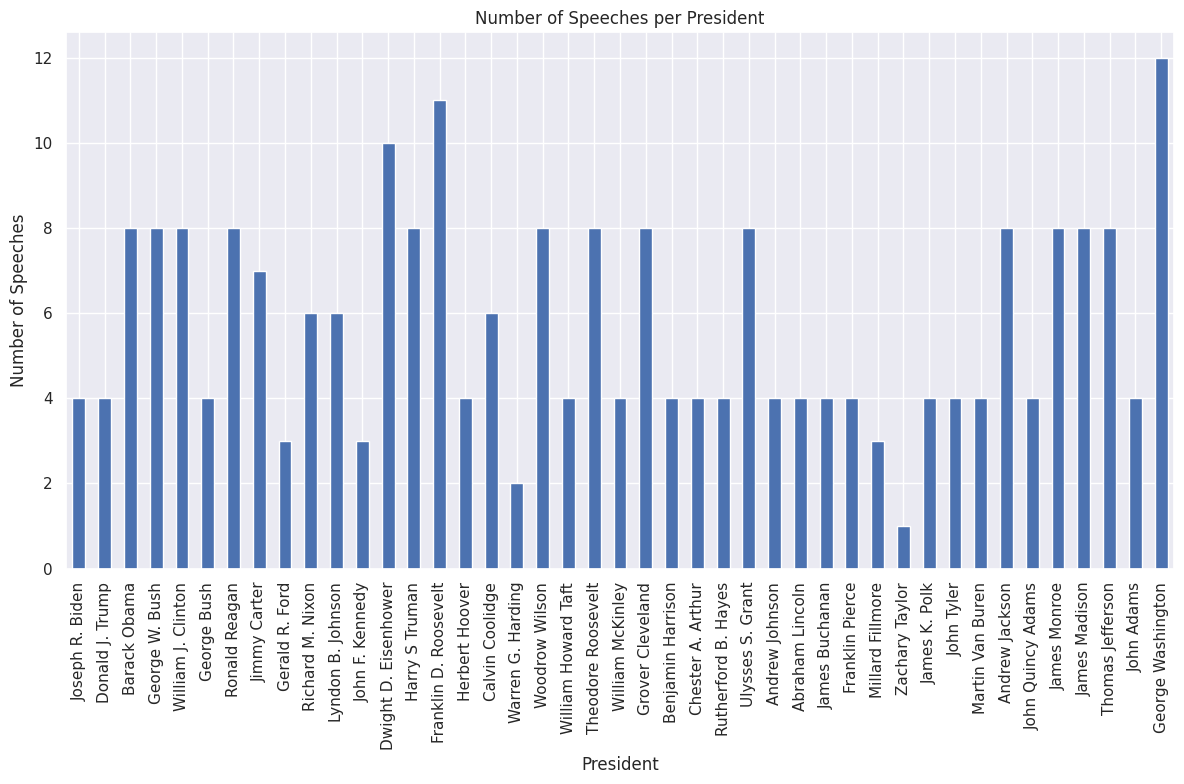

In [163]:
####################
## CALL THIS BLOCK from part01.py
####################


# Plot 
# Hint - use the .plot() method for Pandas Series, make sure all presidents show up on x-axis

# number_speeches_per_president.plot(kind="bar");
plot_number_speeches_per(
    series=number_speeches_per_president, 
    kind_of_plot="bar",
    title="Number of Speeches per President",
    xlabel="President",
    ylabel="Number of Speeches",
    figsize=(XDIMENSION, YDIMENSION)
)

#### Number of Speeches per Year

In [164]:
# Hint - Use value counts and sort by years

number_speeches_per_year = sou["Year"].value_counts(sort=False)
number_speeches_per_year

Year
2024.0    1
2023.0    1
2022.0    1
2021.0    1
2020.0    1
         ..
1794.0    1
1793.0    1
1792.0    2
1791.0    2
1790.0    4
Name: count, Length: 232, dtype: int64

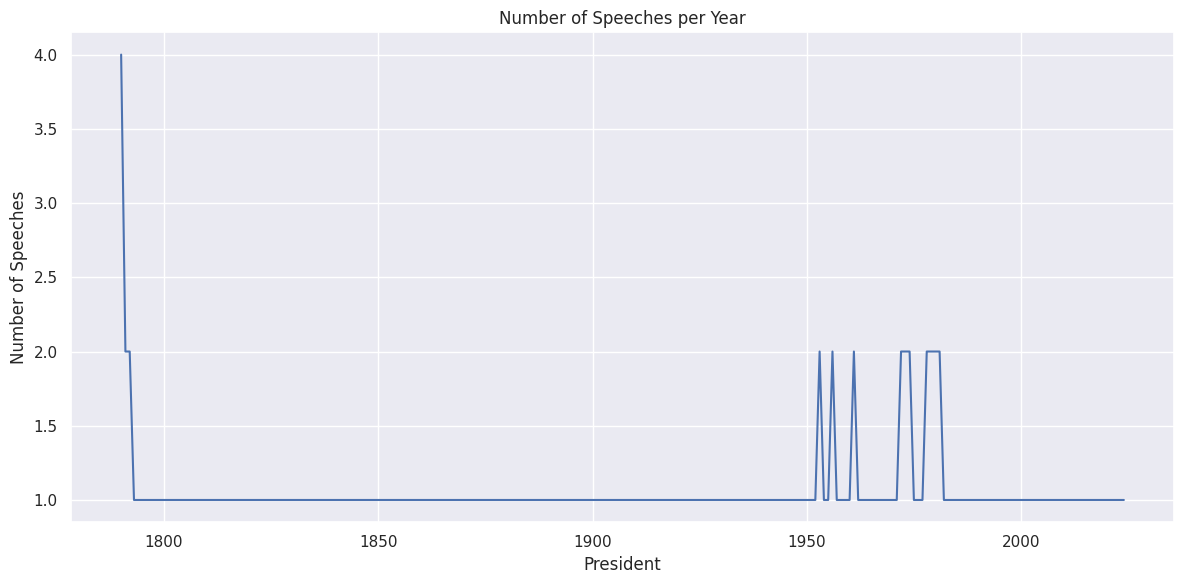

In [165]:
####################
## CALL THIS BLOCK from part01.py
####################

plot_number_speeches_per(
    series=number_speeches_per_year, 
    kind_of_plot="line",
    title="Number of Speeches per Year",
    xlabel="President",
    ylabel="Number of Speeches"
)

#### Word Count Distribution 

In [166]:
# Hint - try seaborn.histplot()

word_count_distribution = sou["Word Count"]
word_count_distribution

0      8003
1      8978
2      7539
3      7734
4      6169
       ... 
241    2264
242    1069
243    1069
244    1069
245    1069
Name: Word Count, Length: 246, dtype: int64

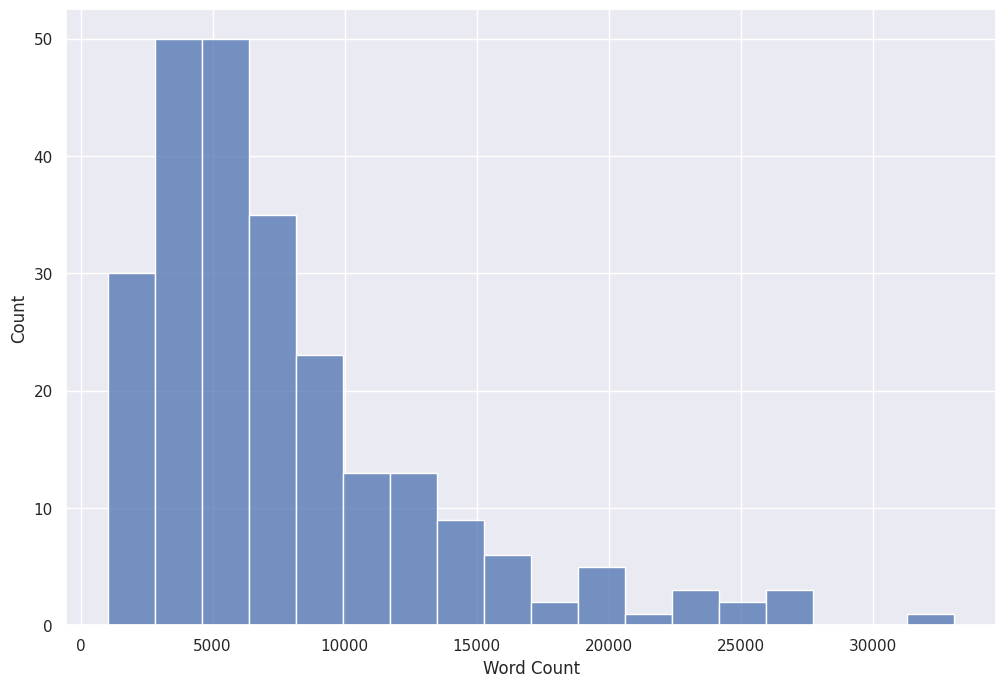

In [167]:
sns.histplot(word_count_distribution);

#### Word Count Distribution over Year

In [168]:
years = sou["Year"]
years

0      2024.0
1      2023.0
2      2022.0
3      2021.0
4      2020.0
        ...  
241    1791.0
242    1790.0
243    1790.0
244    1790.0
245    1790.0
Name: Year, Length: 246, dtype: float64

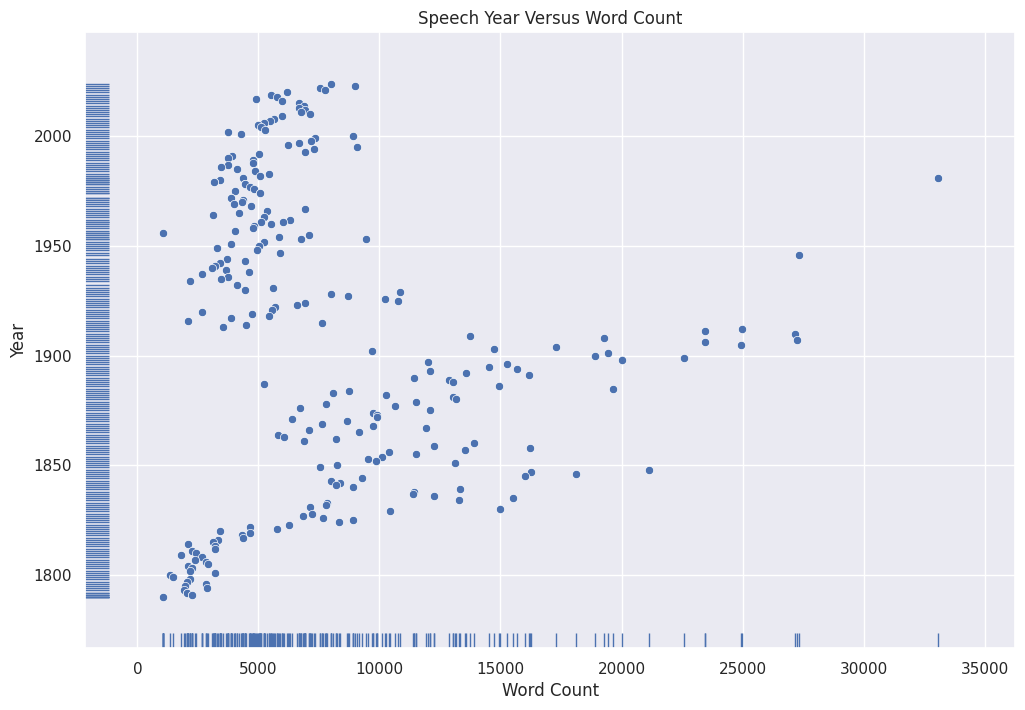

In [169]:
####################
## MOVE THIS BLOCK TO part01.py
####################

# Hint: try seaborn.rugplot()
# sns.scatterplot(data=sou, x="Word Count", y="Year")
# sns.rugplot(data=sou, x="Word Count", y="Year")

def plot_word_count_distribution_per(
    dataframe: pd.DataFrame,
    title: str = "Enter Title Here",
    xlabel: ty.Optional[str] = None,
    ylabel: ty.Optional[str] = None,
    figsize: ty.Tuple[int, int] = (12, 6)
) -> plt.Figure:

    # plot configuration
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.scatterplot(data=dataframe, x=xlabel, y=ylabel, ax=ax)
    sns.rugplot(data=dataframe, x=xlabel, y=ylabel, ax=ax)

    # plot labels

    ax.set_title(title)
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)

    # fig.tight_layout()
    # return fig

####################
## CALL THIS BLOCK from part01.py
####################

plot_word_count_distribution_per(
    dataframe=sou,
    title="Speech Year Versus Word Count",
    xlabel="Word Count",
    ylabel="Year",
    figsize=(XDIMENSION, YDIMENSION)
)

#### Word Count Distribution per President

In [170]:
# Hint: use pandas groupby to get mean word count per president then sort by order

In [175]:
word_count_distribution_per_president = sou\
    .groupby(["President"])["Word Count"]\
    .mean()

In [176]:
word_count_distribution_per_president

President
Abraham Lincoln           6746.250000
Andrew Jackson           11160.500000
Andrew Johnson            9485.500000
Barack Obama              6624.000000
Benjamin Harrison        13507.500000
Calvin Coolidge           8529.833333
Chester A. Arthur        10031.250000
Donald J. Trump           5586.500000
Dwight D. Eisenhower      4703.500000
Franklin D. Roosevelt     3476.090909
Franklin Pierce          10377.000000
George Bush               4357.500000
George W. Bush            4971.750000
George Washington         1880.083333
Gerald R. Ford            4495.666667
Grover Cleveland         13798.250000
Harry S Truman            8131.625000
Herbert Hoover            6251.500000
James Buchanan           13993.000000
James K. Polk            17885.750000
James Madison             2681.000000
James Monroe              5224.500000
Jimmy Carter              7874.714286
John Adams                1769.250000
John F. Kennedy           5555.000000
John Quincy Adams         7662.500000
Jo

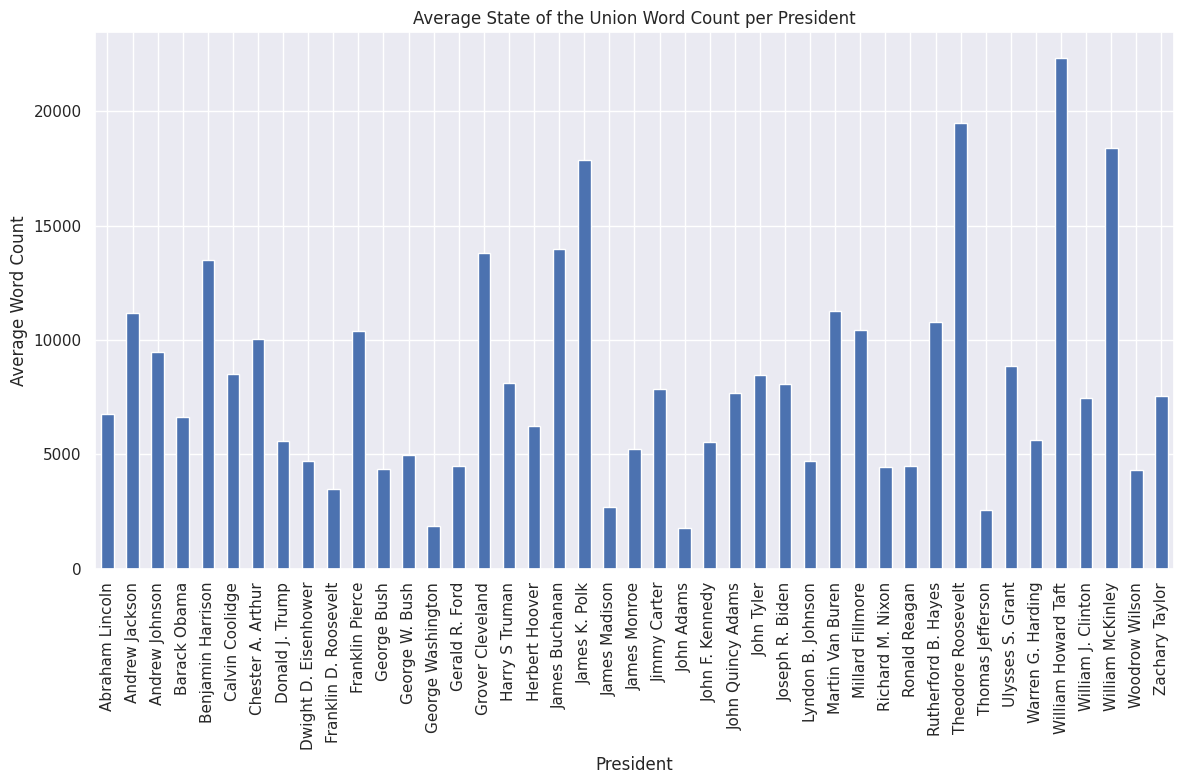

In [177]:
####################
## CALL THIS BLOCK from part01.py
####################

# TODO: adjust this plot. The arrangement is not completely correct.

plot_number_speeches_per(
    series=word_count_distribution_per_president, 
    kind_of_plot="bar",
    title="Average State of the Union Word Count per President",
    xlabel="President",
    ylabel="Average Word Count",
    figsize=(XDIMENSION, YDIMENSION)
)